In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
path = '/content/Mall Customers.csv'

In [4]:
df = pd.read_csv(path)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Display basic information
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

In [14]:
# Encode 'Genre'
encoder = LabelEncoder()
df['Genre'] = encoder.fit_transform(df['Genre'])  # Male: 1, Female: 0

In [15]:
features = df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

<ipython-input-17-f09c15e45027>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(k_range, inertia, 'bo-', color='blue')


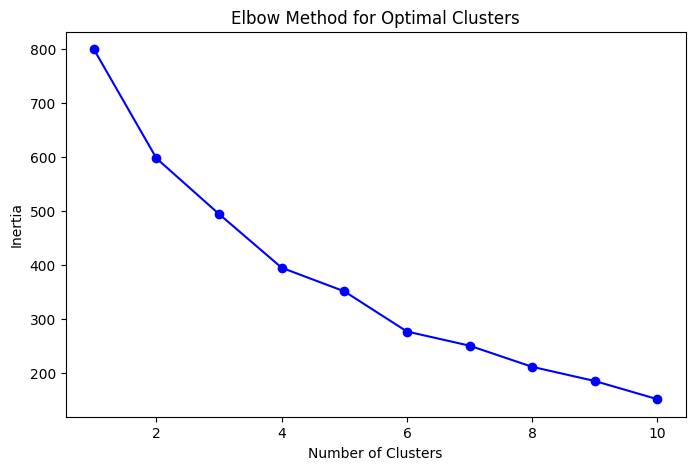

In [17]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-', color='blue')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [19]:
# Set optimal number of clusters (e.g., 5 based on the elbow method)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit and predict clusters
df['Cluster'] = kmeans.fit_predict(scaled_features)

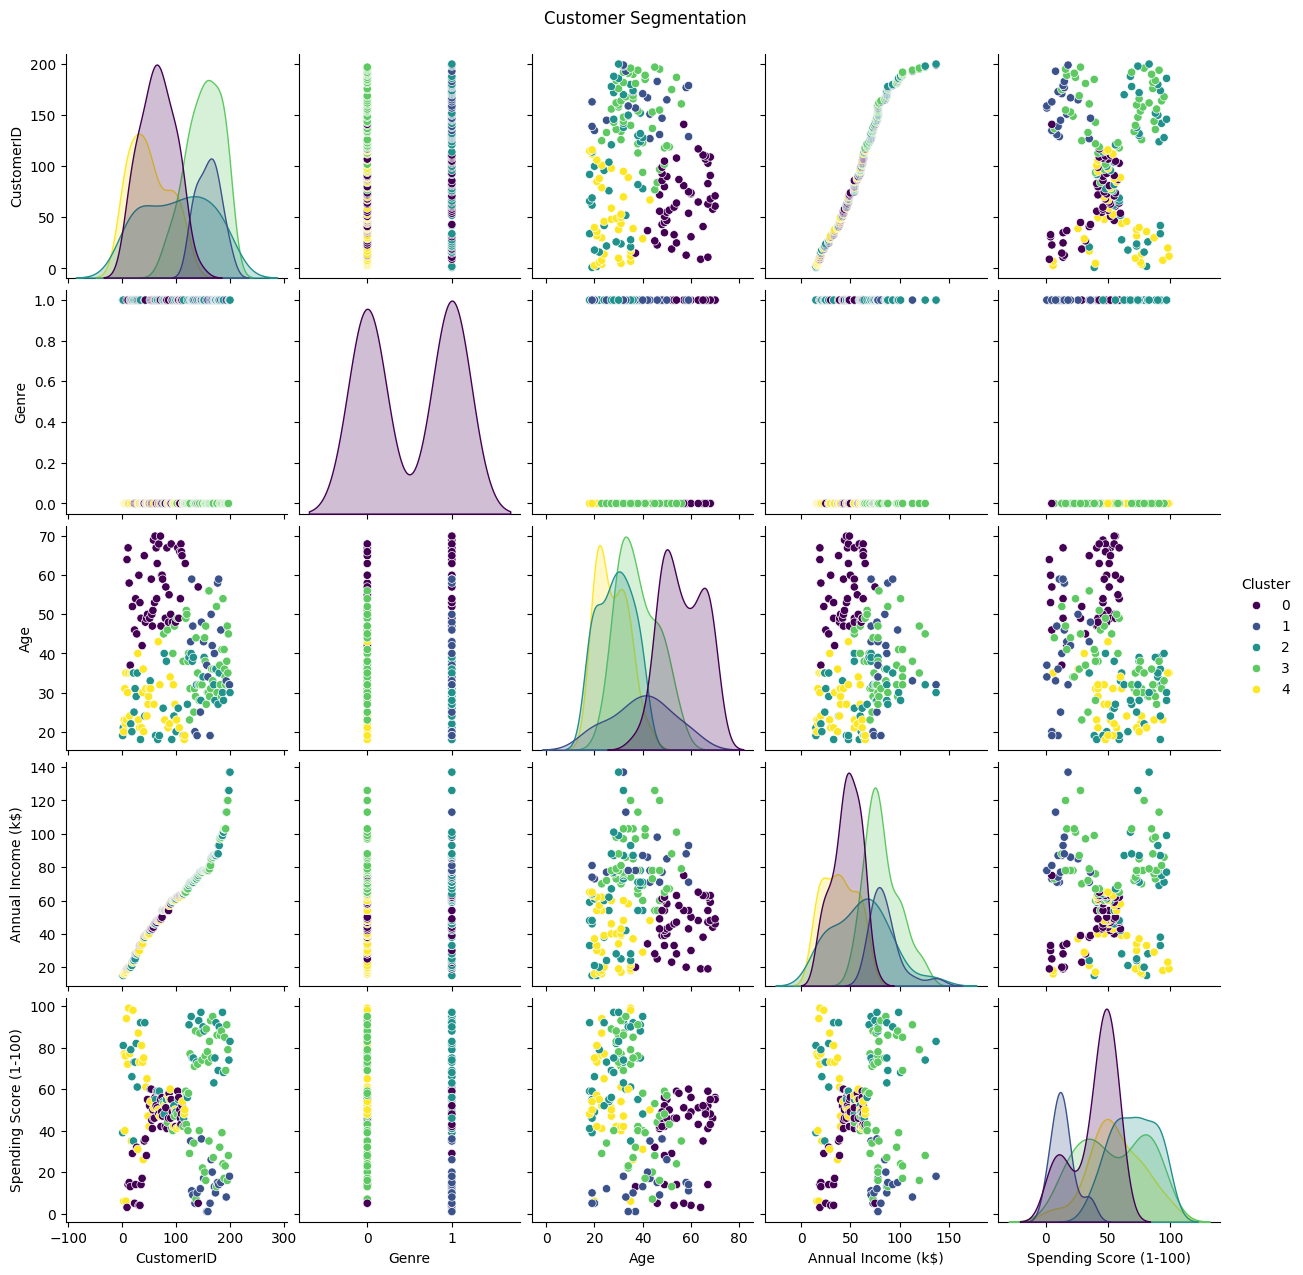

In [20]:
sns.pairplot(df, hue='Cluster', diag_kind='kde', palette='viridis')
plt.suptitle('Customer Segmentation', y=1.02)
plt.show()

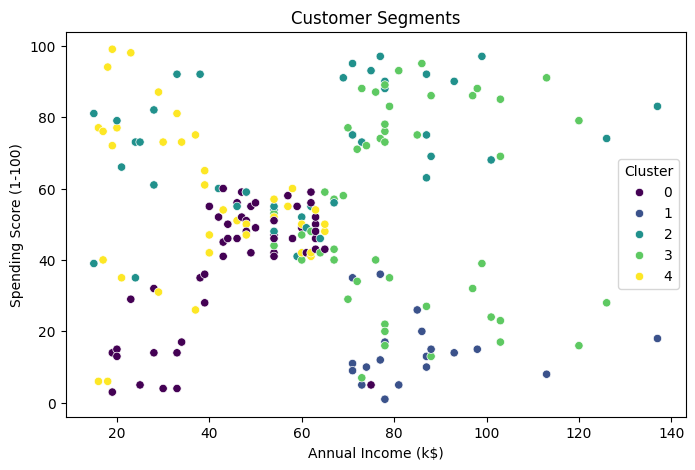

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='viridis',
    data=df
)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [22]:
# Calculate cluster centers and analyze
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features.columns)
cluster_centers = scaler.inverse_transform(cluster_centers)  # Undo scaling
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features.columns)

print("Cluster Centers:")
print(cluster_centers_df)

# Grouping by clusters for insights
print(df.groupby('Cluster').mean())

Cluster Centers:
          Genre        Age  Annual Income (k$)  Spending Score (1-100)
0  5.098039e-01  56.470588           46.098039               39.313725
1  1.000000e+00  39.500000           85.150000               14.050000
2  1.000000e+00  28.690476           60.904762               70.238095
3 -1.665335e-16  37.897959           82.122449               54.448980
4  1.665335e-16  27.315789           38.842105               56.210526
         CustomerID     Genre        Age  Annual Income (k$)  \
Cluster                                                        
0         65.333333  0.509804  56.470588           46.098039   
1        159.500000  1.000000  39.500000           85.150000   
2        100.809524  1.000000  28.690476           60.904762   
3        151.510204  0.000000  37.897959           82.122449   
4         50.526316  0.000000  27.315789           38.842105   

         Spending Score (1-100)  
Cluster                          
0                     39.313725  
1     

# **Cluster Interpretations**

### **Cluster 0**:
- **Average Age**: ~56.5 (Older customers).
- **Annual Income**: ~$46k (Moderate income).
- **Spending Score**: ~39.3 (Low to moderate spenders).
- **Gender Distribution**: Balanced.

**Marketing Strategy**:
- This group might be more cautious with spending. Promote value-based offers or loyalty programs tailored for older customers, focusing on products that provide long-term benefits.

---

### **Cluster 1**:
- **Average Age**: ~39.5.
- **Annual Income**: ~$85k (High income).
- **Spending Score**: ~14.0 (Very low spenders).
- **Gender Distribution**: Male-dominated.

**Marketing Strategy**:
- Despite their high income, these customers spend very little. Offer premium experiences, exclusive memberships, or targeted promotions to encourage spending.

---

### **Cluster 2**:
- **Average Age**: ~28.7 (Younger customers).
- **Annual Income**: ~$61k (Moderate income).
- **Spending Score**: ~70.2 (High spenders).
- **Gender Distribution**: Male-dominated.

**Marketing Strategy**:
- These are younger, high-spending customers. Target them with trendy, high-value products and experiences. Use social media campaigns and loyalty rewards to build long-term relationships.

---

### **Cluster 3**:
- **Average Age**: ~37.9.
- **Annual Income**: ~$82k (High income).
- **Spending Score**: ~54.4 (Moderate to high spenders).
- **Gender Distribution**: Female-dominated.

**Marketing Strategy**:
- These are affluent customers with balanced spending habits. Focus on offering a mix of premium and value-for-money products. Personalized recommendations and concierge services could appeal to this group.

---

### **Cluster 4**:
- **Average Age**: ~27.3 (Younger customers).
- **Annual Income**: ~$39k (Low income).
- **Spending Score**: ~56.2 (Moderate to high spenders).
- **Gender Distribution**: Female-dominated.

**Marketing Strategy**:
- Younger, moderate earners with decent spending habits. Attract them with budget-friendly yet trendy options. Discount offers, student deals, or installment payment options can work well here.
